In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import pickle

In [11]:
import sys
module_path = '/Users/junhaoxiong 1/Documents/Projects/mgcpy'
if module_path not in sys.path:
    sys.path.append(module_path)
from mgcpy.independence_tests.dcorr import DCorr
from mgcpy.benchmarks.power import power
from mgcpy.benchmarks.simulations import linear_sim, quad_sim, ubern_sim, exp_sim, w_sim, joint_sim, spiral_sim, two_parab_sim
from mgcpy.independence_tests.mgc.mgc import MGC
from mgcpy.independence_tests.rv_corr import RVCorr
from mgcpy.independence_tests.hhg import HHG
from mgcpy.independence_tests.kendall_spearman import KendallSpearman

In [3]:
def compute_distance_matrix(data_matrix_X, data_matrix_Y):
    # obtain the pairwise distance matrix for X and Y
    dist_mtx_X = squareform(pdist(data_matrix_X, metric='euclidean'))
    dist_mtx_Y = squareform(pdist(data_matrix_Y, metric='euclidean'))
    return (dist_mtx_X, dist_mtx_Y)

In [4]:
def power_vs_dimension(independence_test, simulation_type, dim_range):
    '''
    Generate power of an independence test given a simulation for a range of dimensions
    
    :param independence_test: an independence_test object
    :param simulation_type: a simulation function from mgcpy.benchmarks.simulations
    :param dim_range: the upper end of the range of dimension
    :return: power for each dimension
    '''
    estimated_power = np.zeros(dim_range)
    for d in range(1, dim_range+1):
        estimated_power[d-1] = power(independence_test, simulation_type, num_samples=100, num_dimensions=d)
    return estimated_power

In [5]:
def compute_all_power(simulation_type, dim_range):
    '''
    Compute power for each independence test for each dimension in a specified range 
    '''

    '''
    Initialize all independence test objects
    Data matrices initialized to np.nan, because in power computation each repeats involves generating new samples
    '''
    mcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='mcorr')
    dcorr = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='dcorr')
    mantel = DCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan,
                  compute_distance_matrix=compute_distance_matrix, corr_type='mantel')
    mgc = MGC(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    rv_corr = RVCorr(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    hhg = HHG(data_matrix_X=np.nan, data_matrix_Y=np.nan, compute_distance_matrix=compute_distance_matrix)
    
    independence_tests = {'MGC': mgc, 'MCorr': mcorr, 'DCorr': dcorr, 'Mantel': mantel, 'RV Corr': rv_corr} 
                          #'HHG': hhg, 'Kendall Spearman': ks}
    power_results = {}
    
    # compute power for each test for each dimension
    for name, test in independence_tests.items():
        power = power_vs_dimension(test, simulation_type, dim_range)
        power_results[name] = power
        print('{} finished'.format(name))
    
    return power_results

In [6]:
def plot_power_curve(power_results, simulation_name):
    '''
    Plot the power of each independence test relative to mgc
    '''
    mgc_power = power_results['MGC']

    for name, power in power_results.items():     
        plt.plot(power-mgc_power, label=name)
   
    plt.xlabel('Dimensions')
    plt.ylabel('Power')
    plt.legend()
    plt.gca().set_xlim(1, mgc_power.shape[0]+1)
    plt.xticks(np.arange(1, mgc_power.shape[0]+1))
    plt.title('Power \n Data: {} Simulation, 100 samples, noise=0'.format(simulation_name))
    plt.show()

In [12]:
%%time
power_results = compute_all_power(two_parab_sim, 20)

MGC finished
MCorr finished
DCorr finished
Mantel finished
RV Corr finished
CPU times: user 29min 56s, sys: 25.5 s, total: 30min 21s
Wall time: 31min 2s


In [13]:
power_results

{'DCorr': array([1.   , 0.982, 0.807, 0.492, 0.369, 0.243, 0.236, 0.218, 0.172,
        0.162, 0.182, 0.12 , 0.191, 0.155, 0.114, 0.124, 0.112, 0.096,
        0.103, 0.071]),
 'MCorr': array([1.   , 0.96 , 0.555, 0.379, 0.248, 0.241, 0.18 , 0.162, 0.102,
        0.097, 0.122, 0.093, 0.117, 0.114, 0.085, 0.109, 0.103, 0.088,
        0.075, 0.071]),
 'MGC': array([1.   , 1.   , 1.   , 1.   , 0.973, 0.89 , 0.794, 0.683, 0.589,
        0.497, 0.406, 0.38 , 0.334, 0.306, 0.275, 0.231, 0.203, 0.209,
        0.206, 0.156]),
 'Mantel': array([1.   , 1.   , 1.   , 0.998, 0.984, 0.927, 0.875, 0.846, 0.779,
        0.753, 0.732, 0.722, 0.62 , 0.603, 0.503, 0.553, 0.51 , 0.509,
        0.542, 0.454]),
 'RV Corr': array([1.   , 0.989, 0.886, 0.828, 0.685, 0.624, 0.515, 0.526, 0.443,
        0.404, 0.364, 0.33 , 0.347, 0.312, 0.306, 0.276, 0.277, 0.252,
        0.247, 0.21 ])}

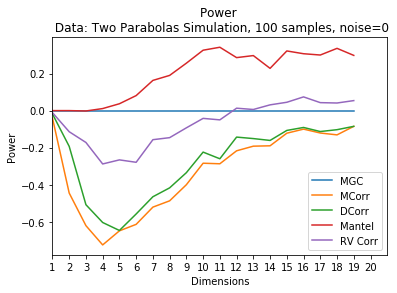

CPU times: user 161 ms, sys: 17.2 ms, total: 178 ms
Wall time: 176 ms


In [15]:
%%time
plot_power_curve(power_results, 'Two Parabolas')

In [16]:
pickle.dump(power_results, open('../../NeuroData/power_curve_two_parabolas.pkl', 'wb'))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: ResourceWarning: unclosed file <_io.BufferedWriter name='../../NeuroData/power_curve_two_parabolas.pkl'>
  """Entry point for launching an IPython kernel.
